**This notebook is dedicated to explore the images in our dataset.**

The dataset is from the [analyticsvidhya](https://datahack.analyticsvidhya.com/contest/practice-problem-age-detection/) platform. The goal is to predict the approximate age of an indian actor: whether he is young, middle-aged, or old.

The dataset consists of two main sets: one for training (labeled) and the other for testing (unlabeled). Each of which contains a csv file along with a zip file containing the images

# Data Visualization

1- Downloading the dataset.

2- Assemble the images with their corresponding labels (for training set of course) in a list of tuples [(img,label)...].

3- Visualize some sample images with their labels.

In [ ]:
# Step 1:  Downloading the dataset.

! wget https://datahack-prod.s3.amazonaws.com/test_zip/test_Bh8pGW3.zip
! unzip test_Bh8pGW3.zip
! wget https://datahack-prod.s3.amazonaws.com/train_zip/train_DETg9GD.zip
! unzip train_DETg9GD.zip

In [20]:
# Step 2:  Assemble images with their corresponding labels.

import pandas as pd
import numpy as np
import cv2 as cv

# Training data
train_csv=pd.read_csv("train.csv")
train_set=[]
for i in range(train_csv.shape[0]):
    # Pitfall: Opencv uses BGR not RGB
    img=cv.imread(f"Train/{train_csv.loc[i,'ID']}",cv.IMREAD_UNCHANGED)
    img=cv.cvtColor(img, cv.COLOR_BGR2RGB)
    train_set.append((img,train_csv.loc[i,'Class']))

# Testing data
test_csv=pd.read_csv("test.csv")
test_set=[]
for i in range(test_csv.shape[0]):
    img=cv.imread(f"Test/{test_csv.loc[i,'ID']}",cv.IMREAD_UNCHANGED)
    img=cv.cvtColor(img, cv.COLOR_BGR2RGB)
    test_set.append((img,'UNKOWN'))

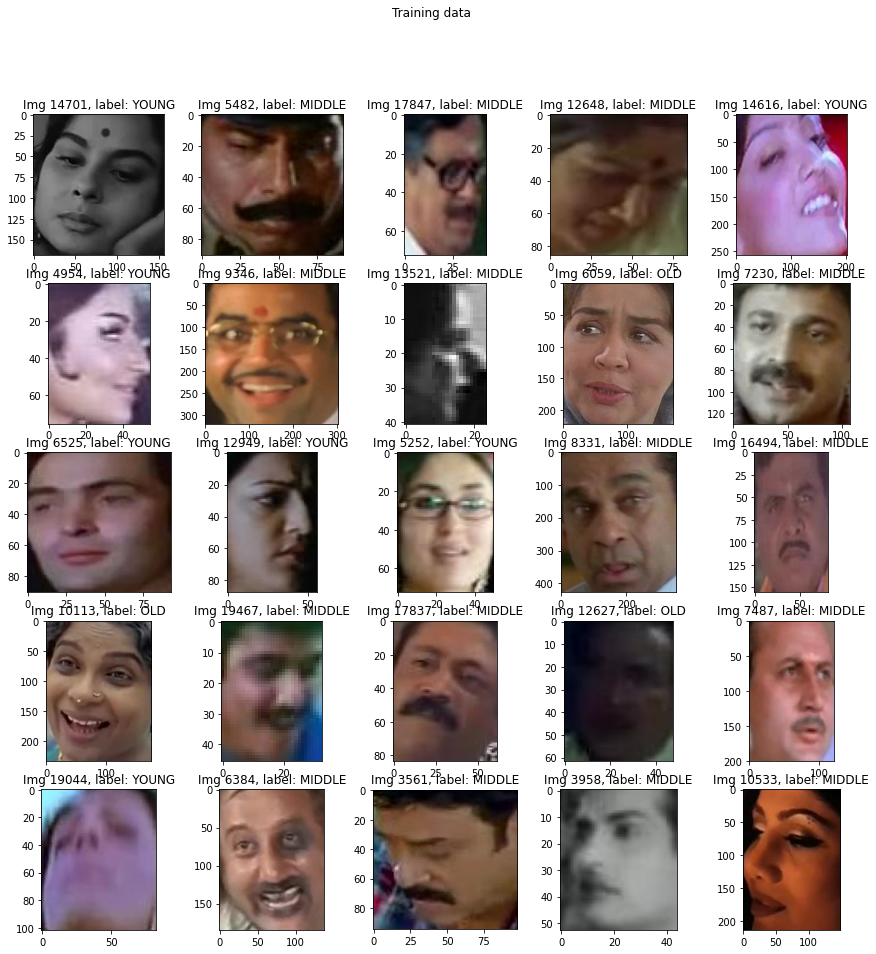

In [21]:
# Step 3: Visualize some sample images with their labels.

import matplotlib.pyplot as plt

n=5
fig, axs = plt.subplots(n,n,figsize=(15,15))
fig.suptitle("Training data")
imgs_to_plot=np.random.randint(0,high=len(train_set),size=n**2)
for i in range(n):
    for j in range(n):
        indx=imgs_to_plot[i*n+j]
        axs[i,j].imshow(train_set[indx][0])
        axs[i,j].set_title(f'Img {indx+1}, label: {train_set[indx][1]}')
plt.show()

# Statistics about data

1- Scatter the different images shapes.

2- Distribution of the labels.

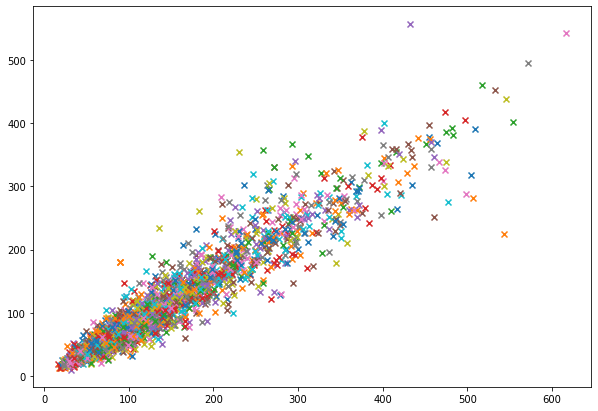

In [33]:
# Step 1: Image shapes

fig,ax=plt.subplots(figsize=(10,7))
for t in train_set[:3000]:
    x,y,_=t[0].shape
    ax.scatter(x,y,marker='x')
plt.show()

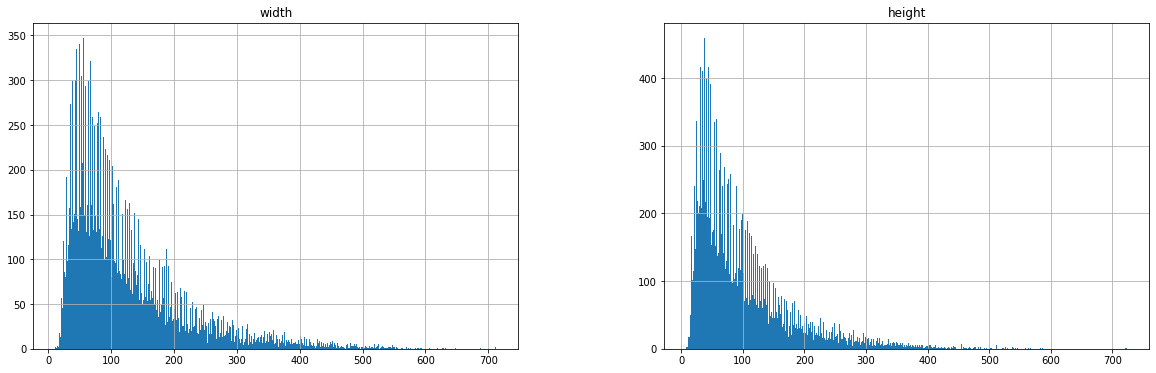

,width,height
count,19906.000000,19906.000000
mean,125.467246,99.010700
std,92.986340,78.192463
min,11.000000,8.000000
25%,59.000000,43.000000
50%,97.000000,75.000000
75%,163.000000,129.000000
max,713.000000,724.000000


In [38]:
# plot the distribution of the width and height of images
df=pd.DataFrame()
widths,heights=[],[]
for t in train_set:
    x,y,_=t[0].shape
    widths.append(x)
    heights.append(y)
df=pd.DataFrame({'width':widths,'height':heights})
df.hist(bins=500,figsize=(20,6))
plt.show()
df.describe()

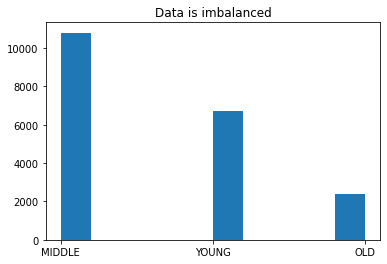

Mistaking an old actor with a young one is unforgivable


In [41]:
# Step 2: Distribution of the labels

labels=[t[1] for t in train_set]
plt.hist(labels)
plt.title("Data is imbalanced")
plt.show()
print("Mistaking an old actor with a young one is unforgivable")

# Image Transformation
1- Convert image to grayscale.

2- Apply histogram equalization.

3- Detect Edges.

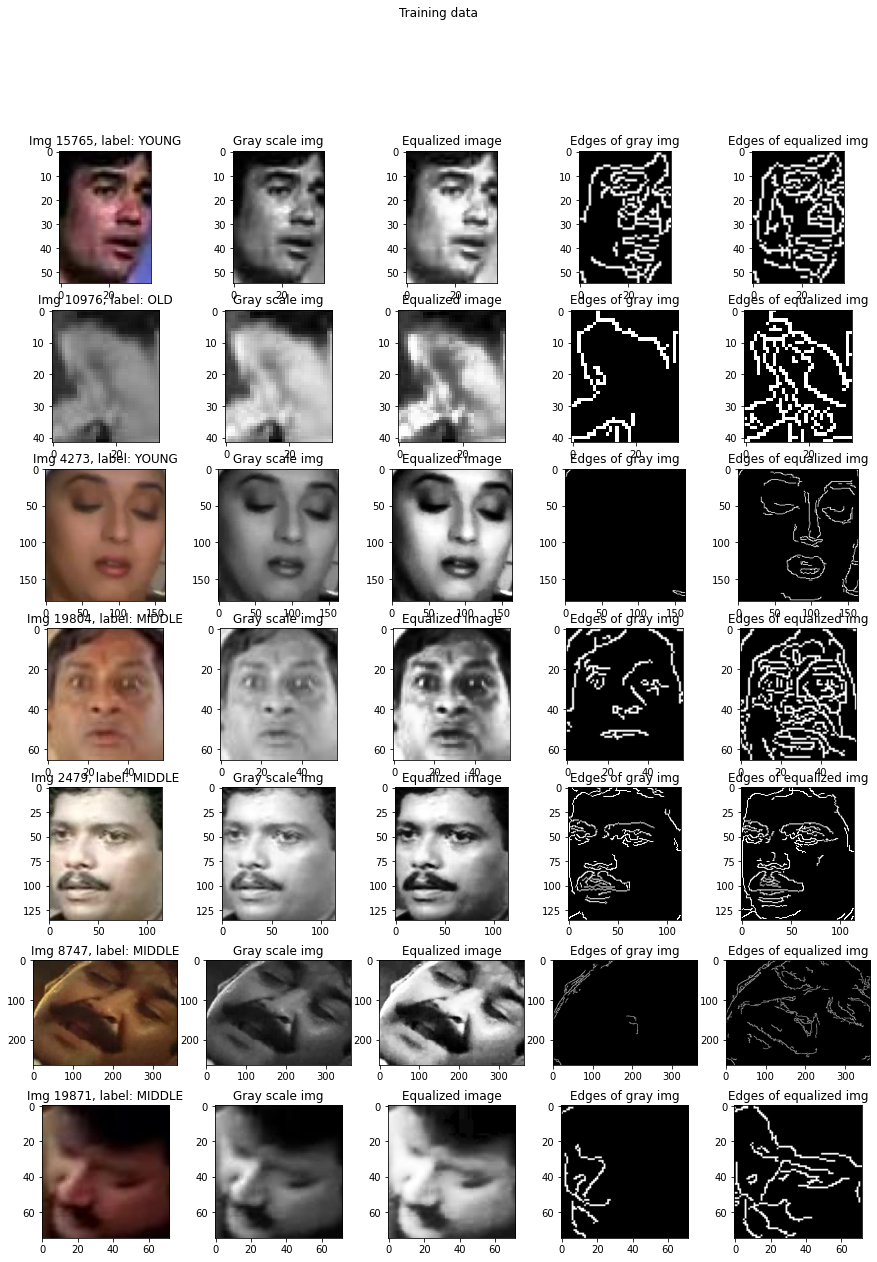

There isn't much difference between the two color spaces.
The equalized images highlights the different parts of the images
Edges are more clear in the equalized images.


In [58]:
# All steps.

def plot(ax,img,title):
    ax.imshow(img, cmap = 'gray')
    ax.set_title(title)

n=7
fig, axs = plt.subplots(n,5,figsize=(15,20))
fig.suptitle("Training data")
imgs_to_plot=np.random.randint(0,high=len(train_set),size=n)
for i in range(n):
        indx=imgs_to_plot[i]
        axs[i,0].imshow(train_set[indx][0])
        axs[i,0].set_title(f'Img {indx+1}, label: {train_set[indx][1]}')
        
        gray=cv.cvtColor(train_set[indx][0],cv.COLOR_RGB2GRAY)
        plot(axs[i,1],gray,'Gray scale img')

        # Pitfall the equalization process is applied on a single channel image.
        eq=cv.equalizeHist(gray)
        plot(axs[i,2],eq,'Equalized image')
     
        plot(axs[i,3],cv.Canny(gray,100,200),"Edges of gray img")

        plot(axs[i,4],cv.Canny(eq,100,200),"Edges of equalized img")


plt.show()
print("There isn't much difference between the two color spaces.")
print("The equalized images highlights the different parts of the images")
print("Edges are more clear in the equalized images.")